<a href="https://colab.research.google.com/github/1cyrix/IS_4487_Tokyo/blob/main/day3_lab_retailer_intro_ipynb_McKinley_Hollison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 Lab, IS 4487

Outline

Repeat exercises from Lab 2, for practice, but with the *SuperStore Retail Orders* dataset

- Loading installed packages
- Inspect data
- Clean data
- Summarize data
- Explore plot types and search for insights

Please use the Gemini AI tool to get coding ideas.



# Notebook Instructions
- Remember to save a copy of the notebook in Drive so that you can save your changes.
- Complete the Assignment Tasks.
- When you are done revising this notebook save your changes to GitHub and upload the URL for the file to Canvas for the assignment.
- Some of these assignments ask you to do things we have not covered yet.  Use AI to come up with a solution.

# Load Libraries

➡️ Assignment Tasks
- Load Pandas

In [2]:
# your code goes here
import pandas as pd


# Load Data

In [4]:
ss = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/main/Labs/DataSets/superstore_retail_orders.csv")

# Summarize and Review Data

➡️ Assignment Tasks

- Describe or profile the dataframe

In [5]:
# Your code goes here
ss.describe()

,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


In [6]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [7]:
ss.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99


# Prepare Data

➡️ Assignment Tasks
- Remove rows with empty (NULL) values
- Locate outliers in any of the variables.   Filter them out if they appear to be mistakes; keep them if they are exceptional cases.
- Create a new field: total_purchase. This should be product_price x quantity.

In [20]:
# Drop NAs
ss = ss.dropna()

In [21]:
# Search for and filter outliers
Q1 = ss['product_price'].quantile(0.25)
Q3 = ss['product_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
ss_filtered = ss[(ss['product_price'] >= lower_bound) & (ss['product_price'] <= upper_bound)]

In [22]:
# create total_purchase
ss['total_purchase'] = ss['product_price'] * ss['quantity']

Check that your cleaning worked

In [23]:
# your code goes here
ss[['product_price', 'total_purchase']].describe()

,product_price,total_purchase
count,55500.000000,5.550000e+04
mean,6225.512959,1.195031e+04
std,35876.479594,7.496207e+04
min,2.290000,2.290000e+00
25%,7.950000,1.497000e+01
50%,475.600000,4.756000e+02
75%,914.620000,1.219260e+03
max,235481.000000,2.024994e+06


# Summarize Data

➡️ Assignment Tasks
- Calculate the average price per year-month
- Calculate the total revenue per year month

Does more cleaning need to be done? If so, do it and then recreate the above summary tables.

In [18]:
# average price
ss['order_year_month'] = ss['order_date'].str[:7]
average_price_per_month = average_price_per_month[(average_price_per_month.index >= '2019') & (average_price_per_month.index < '2024')]
print(average_price_per_month)

order_year_month
2020-01    3172.420978
2020-02    3199.469359
2020-03    3242.035279
2020-04    3194.646275
2020-05    3192.571359
2020-06    3132.275911
2020-07    1959.974251
2020-08    1924.981087
2020-09    1764.130833
2020-10    1800.830762
2020-11    1666.368901
2020-12    1729.697795
2021-01    1774.621612
2021-02    1755.272269
2021-03    1760.495962
2021-04    1691.161107
2021-05    1640.100368
2021-06    1694.477581
2021-07    4296.981881
2021-08    6662.377315
2021-09    7198.551696
2021-10    6685.684636
2021-11    6808.999765
2021-12    5970.342486
2022-01    6528.009897
2022-02    6798.032431
2022-03    5876.657502
2022-04    6503.221775
2022-05    7160.397720
2022-06    6983.707677
Name: product_price, dtype: float64


In [19]:
# total revenue
total_revenue_per_month = total_revenue_per_month[(total_revenue_per_month.index >= '2019') & (total_revenue_per_month.index < '2024')]
print(total_revenue_per_month)

order_year_month
2020-01     4745149.93
2020-02      499117.22
2020-03      706668.08
2020-04      651707.84
2020-05      657669.70
2020-06      635852.01
2020-07      484113.64
2020-08      531294.78
2020-09      338713.12
2020-10      401585.26
2020-11      303279.14
2020-12      556962.69
2021-01      429458.43
2021-02      456370.79
2021-03      466531.43
2021-04      488745.56
2021-05      534672.72
2021-06      525288.05
2021-07    10491297.49
2021-08    47230286.48
2021-09    50609492.94
2021-10    53111387.82
2021-11    50190457.56
2021-12    59170723.61
2022-01    57736324.17
2022-02    57693497.16
2022-03    57451390.06
2022-04    63203843.38
2022-05    73458762.70
2022-06    67952708.22
Name: total_purchase, dtype: float64


# Plot Data

➡️ Assignment Tasks
- Produce two plots that show patterns or relationships in the data.
- Interpret these patterns for potential value to the business.  

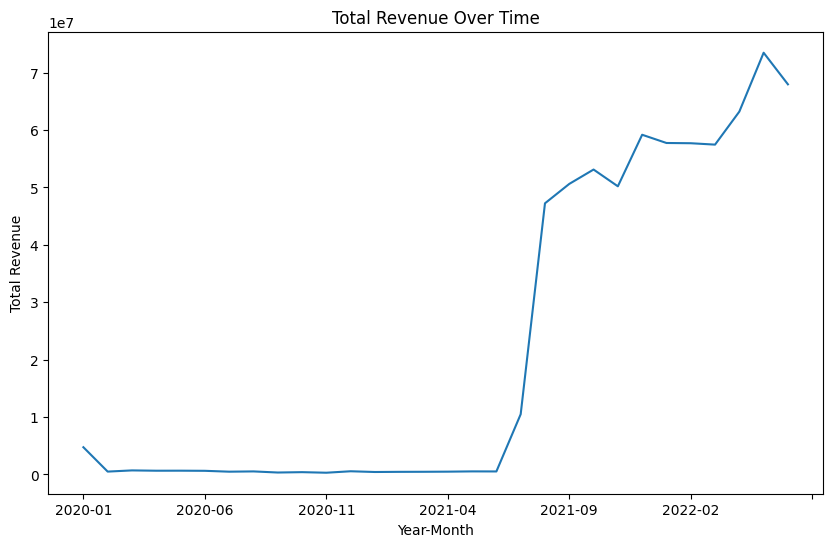

In [26]:
# Your code goes here.  Plot 1
import matplotlib.pyplot as plt
total_revenue_per_month.plot(kind='line', figsize=(10, 6))
plt.title('Total Revenue Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.show()

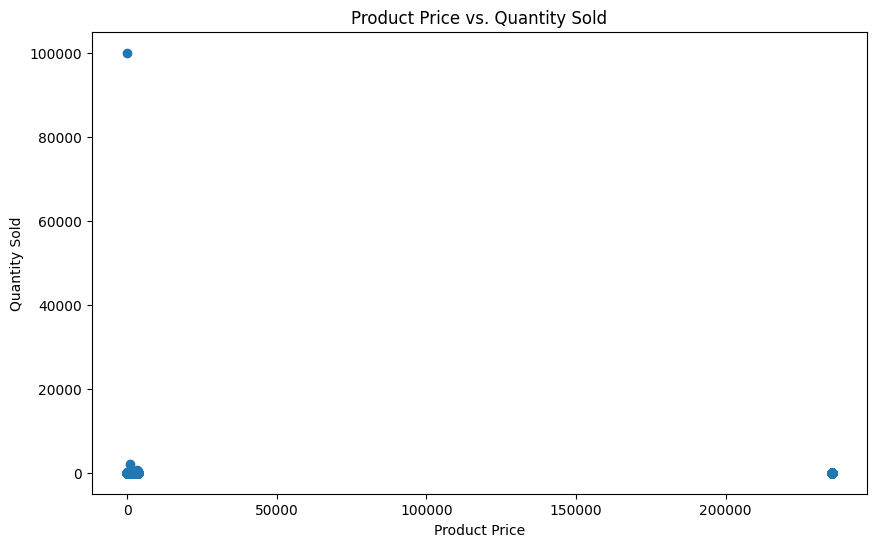

In [28]:
# Your code goes here.  Plot 2
plt.figure(figsize=(10, 6))
plt.scatter(ss['product_price'], ss['quantity'])
plt.title('Product Price vs. Quantity Sold')
plt.xlabel('Product Price')
plt.ylabel('Quantity Sold')
plt.show()

Make an interpretive comment.

I noticed that theres a trend where revenue greatly increased in late 2021. Specifically in July, where the total revenue took a massive jump, and this trend continued. Showing that the products were selling at a much higher rate at and after this time.

It would appear that this is because of an introduction of a new product, as we can see on the scatter plot, the quantity of items sold only for one item is incredibly high in comparison to everything else in the plot. Though there is another outlier where a product for a very high selling price was sold, but at a very low quantity. This possibly could have contributed to the increase in revenue as well.